<a href="https://colab.research.google.com/github/Sofil1886/Deep_Portfolio_Theory/blob/master/%D0%9C%D0%B0%D0%BD%D0%B0%D0%B5%D0%B2_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Nasdaq-Data-Link
!pip install yfinance
!pip install talib-binary

!pip install pyts
!pip install mplfinance
!pip install image_slicer
!pip install pypng
!pip install Pillow
!pip install natsort

!pip install shutil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 4.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 71 kB 3.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |███████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 3.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


In [135]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

import nasdaqdatalink
import talib
import pandas_datareader as pdr
import datetime
import plotly.express as px
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras import regularizers
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.losses import categorical_crossentropy
from keras.models import Model
from sklearn.model_selection import train_test_split
from dateutil.parser import parse as du_parse
from dateutil.relativedelta import relativedelta
import scipy.stats as stats
from keras.utils import np_utils
from  keras.models import load_model
from keras.utils.vis_utils import plot_model
from keras.models import model_from_json

import mplfinance as mpf
from pyts.datasets import load_gunpoint
from pyts.image import RecurrencePlot
from IPython.display import Image
from PIL import Image
import image_slicer
import imageio
import png

import natsort 
import os
import glob
from numpy import asarray

import shutil

In [3]:
nvda = yf.download('NVDA')
nvda['Date'] = nvda.index
nvda['SMA'] = talib.MA(nvda['Adj Close'], timeperiod = 20)
nvda = nvda.dropna()
nvda

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date,SMA
Date,,,,,,,,
1999-02-19,0.416667,0.442708,0.411458,0.434896,0.399229,7536000.0,1999-02-19,0.376040
1999-02-22,0.442708,0.447917,0.414063,0.437500,0.401619,20524800.0,1999-02-22,0.377295
1999-02-23,0.447917,0.467448,0.421875,0.458333,0.420744,13809600.0,1999-02-23,0.377534
1999-02-24,0.526042,0.546875,0.483073,0.494792,0.454213,61276800.0,1999-02-24,0.381060
1999-02-25,0.515625,0.531250,0.471354,0.479167,0.439869,14913600.0,1999-02-25,0.383929
...,...,...,...,...,...,...,...,...
2022-11-01,138.110001,139.250000,135.190002,135.429993,135.429993,43281700.0,2022-11-01,124.864999
2022-11-02,138.500000,142.100006,132.110001,132.190002,132.190002,67262800.0,2022-11-02,124.870000
2022-11-03,130.429993,137.809998,129.559998,134.210007,134.210007,50006500.0,2022-11-03,125.015500


In [4]:
# !mkdir images
!mkdir images_cropped
!mkdir images_cropped_resized

In [ ]:
# Генерируем изображения или загружаем самостоятельно ранее сгенерируемые изображения
n = 0
for image_df in range(0,len(nvda), 20):
  df_for_images = nvda.iloc[image_df:image_df+20]
  mpf.plot(df_for_images, style = 'yahoo', tight_layout = True, volume = True, savefig=f'/content/images/{n}.png')
  n+=1


In [20]:
# Обрезаем изображения
def make_whit_black_image(img):
  thresh = 200
  fn = lambda x : 0 if x > thresh else 255
  image_file = img.convert('L').point(fn, mode='1')
  return image_file


directory_path = '/content/content/images'
n = 0
for img_path in natsort.natsorted(glob.glob(os.path.join(directory_path, "*.png")), reverse=False):
  img = Image.open(img_path)
  img_w_b = make_whit_black_image(img)
  img_w_b.crop((0, 0, 710, 507)).save(f'/content/images_cropped/{n}.png')
  n += 1

In [21]:
# Преобразуем изображение в нужный нам формат
directory_path_2 = '/content/images_cropped'
n = 0
for img_path in natsort.natsorted(glob.glob(os.path.join(directory_path_2, "*.png")), reverse=False):
  img = Image.open(img_path)
  img_resized = img.resize((60, 64))
  img_resized.save(f'/content/images_cropped_resized/{n}.png')
  n += 1

In [22]:
# Делаем Метки в качестве целевых переменных для обучения
n = 0
class_return = lambda x : 1 if x > 0 else 0
returns = []
for raw_label in range(20,len(nvda), 20):
  try:
    returns.append(nvda.iloc[raw_label:raw_label+5][['Close']].pct_change(4).dropna()['Close'][0])
  except:
    break
labels = [class_return(x) for x in returns]
labels_array = np.asarray(labels)
print(np.count_nonzero(labels_array == 1))
print(np.count_nonzero(labels_array == 0))

166
132


In [23]:
labels_array.shape

(298,)

In [24]:
# Преобразуем изображение в нужный нам формат
directory_path_3 = '/content/images_cropped_resized'

Data_array = np.empty((1, 64, 60))
for img_path in natsort.natsorted(glob.glob(os.path.join(directory_path_3, "*.png")), reverse=False):
  im_gray = np.array(Image.open(img_path).convert('L'))
  im_gray_array = im_gray[np.newaxis]
  Data_array = np.vstack((Data_array, im_gray_array))


Final_array = Data_array[1:299]



In [25]:
print(Final_array.shape)
print(labels_array.shape)

(298, 64, 60)
(298,)


In [26]:
labels_array_bin = np_utils.to_categorical(labels_array, num_classes = 2)

In [27]:
# делим датасет на train, validation и test
data_array_for_train_val = Final_array[:int(Final_array.shape[0]*0.5)]
labels_array_bin_for_train_val = labels_array_bin[:int(labels_array_bin.shape[0]*0.5)]

data_array_for_test = Final_array[int(Final_array.shape[0]*0.5):]
labels_array_bin_for_test = labels_array_bin[int(labels_array_bin.shape[0]*0.5):]

print(data_array_for_train_val.shape)
print(labels_array_bin_for_train_val.shape)

print(data_array_for_test.shape)
print(labels_array_bin_for_test.shape)

(149, 64, 60)
(149, 2)
(149, 64, 60)
(149, 2)


In [30]:
img_rows = Final_array.shape[1]
img_columns =  Final_array.shape[2]
print(img_rows)
print(img_columns)

64
60


In [115]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-05)
sgd = SGD(learning_rate=1e-05)
weights_file = 'CNN_1_weights.h5'
callback = ModelCheckpoint(weights_file,
              monitor='val_accuracy',
              mode='max',
              save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

CNN = Sequential()
CNN.add(tf.keras.layers.Conv2D(64, (5,3), kernel_initializer='glorot_uniform', padding='same', strides = (3,1), dilation_rate=(1, 1), input_shape=(img_rows, img_columns, 1)))
CNN.add(BatchNormalization())
CNN.add(Activation('LeakyReLU'))
CNN.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 1)))
CNN.add(tf.keras.layers.Conv2D(128, (5,3), kernel_initializer='glorot_uniform', padding='same', input_shape=(img_rows, img_columns, 1)))
CNN.add(BatchNormalization())
CNN.add(Activation('LeakyReLU'))

CNN.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 1)))
CNN.add(tf.keras.layers.Conv2D(256, (5,3), kernel_initializer='glorot_uniform', padding='same', input_shape=(img_rows, img_columns, 1)))
CNN.add(BatchNormalization())
CNN.add(Activation('LeakyReLU'))

CNN.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 1)))
CNN.add(Flatten())
CNN.add(Dropout(0.5))
CNN.add(Dense(2, activation = 'softmax'))


CNN.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 22, 60, 64)        1024      
                                                                 
 batch_normalization_6 (Batc  (None, 22, 60, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 22, 60, 64)        0         
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 11, 60, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 11, 60, 128)       123008    
                                                                 
 batch_normalization_7 (Batc  (None, 11, 60, 128)    

In [116]:
CNN.compile(optimizer=sgd, loss = 'binary_crossentropy', metrics=['accuracy'])
history = CNN.fit(data_array_for_train_val, 
                    labels_array_bin_for_train_val, 
                    batch_size = 128,
                    epochs=1000, 
                    validation_split=0.3, 
                    verbose=1,
                    callbacks = [callback, es])

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 1.0574 - accuracy: 0.4904 - val_loss: 2.0637 - val_accuracy: 0.4000
Epoch 2/1000
1/1 [==============================] - 4s 4s/step - loss: 1.0848 - accuracy: 0.4808 - val_loss: 1.6781 - val_accuracy: 0.4000
Epoch 3/1000
1/1 [==============================] - 4s 4s/step - loss: 0.9826 - accuracy: 0.4712 - val_loss: 1.4761 - val_accuracy: 0.4000
Epoch 4/1000
1/1 [==============================] - 4s 4s/step - loss: 1.0586 - accuracy: 0.5192 - val_loss: 1.3464 - val_accuracy: 0.4000
Epoch 5/1000
1/1 [==============================] - 4s 4s/step - loss: 1.0789 - accuracy: 0.5385 - val_loss: 1.2577 - val_accuracy: 0.4000
Epoch 6/1000
1/1 [==============================] - 4s 4s/step - loss: 1.0977 - accuracy: 0.4519 - val_loss: 1.1900 - val_accuracy: 0.4000
Epoch 7/1000
1/1 [==============================] - 4s 4s/step - loss: 1.1233 - accuracy: 0.4519 - val_loss: 1.1368 - val_accuracy: 0.4000
Epoch 8/1000
1/1 [=========

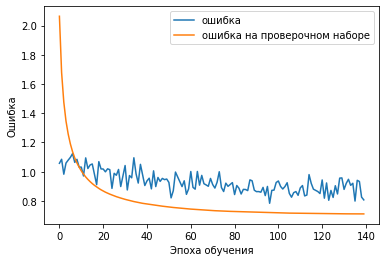

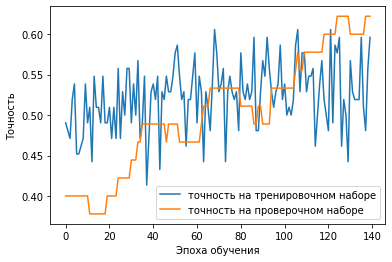

In [117]:
                                                ### График ошибки и качества ###
plt.plot(history.history['loss'], 
         label='ошибка')
plt.plot(history.history['val_loss'], 
         label='ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], 
         label='точность на тренировочном наборе')
plt.plot(history.history['val_accuracy'], 
         label='точность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [118]:
scores = CNN.evaluate(data_array_for_test, labels_array_bin_for_test)
print(scores[1])

5/5 [==============================] - 1s 264ms/step - loss: 0.6945 - accuracy: 0.5503
0.5503355860710144


In [119]:
prediction = CNN.predict(data_array_for_test)

5/5 [==============================] - 1s 264ms/step


In [120]:
labels_array_for_test = labels_array[int(labels_array.shape[0]*0.5):]
print(np.argmax(prediction,  axis=1))
print(labels_array_for_test)

[1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0
 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0
 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0
 0]
[1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1
 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1
 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1
 1]


In [121]:
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(labels_array_for_test, np.argmax(prediction,  axis=1))
report = classification_report(labels_array_for_test, np.argmax(prediction,  axis=1))
print(report)


              precision    recall  f1-score   support

           0       0.47      0.60      0.53        63
           1       0.64      0.51      0.57        86

    accuracy                           0.55       149
   macro avg       0.56      0.56      0.55       149
weighted avg       0.57      0.55      0.55       149



In [131]:
## Считаем точность если доверяем модели при ее уверенности не ниже 70%
threshold = 0.7
preds = prediction[:,1][prediction[:,1] >= threshold]
actuals = labels_array_bin_for_test[:,1][prediction[:,1] >= threshold]

from sklearn.metrics import accuracy_score
print ('Accuracy on higher threshold:', accuracy_score(actuals,[1 if x > 0.5 else 0 for x in preds]))
print('Returns:',len(actuals))
print(len(labels_array_for_test))

Accuracy on higher threshold: 0.6923076923076923
Returns: 13
149


accuracy: 0.60


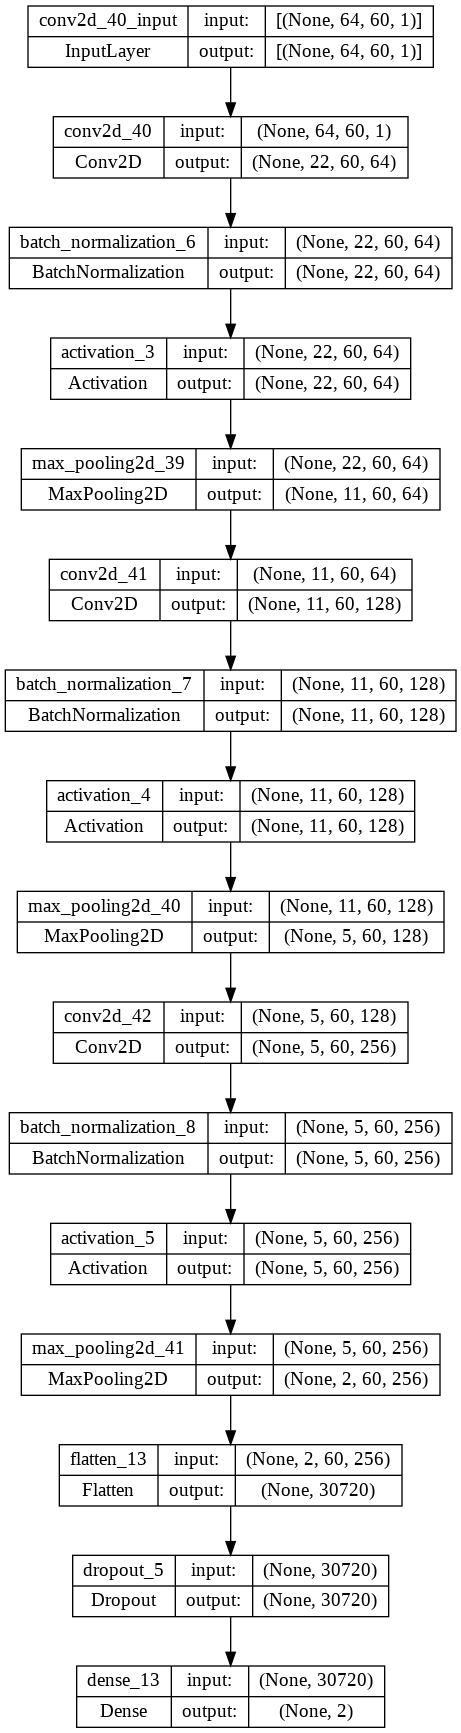

In [136]:
# Сохранение модели
json_file = 'CNN_1.json'
model_json = CNN.to_json()
with open(json_file, 'w') as f:
  f.write(model_json)

# Загрузка модели и присвоение ей сохраненных весов
json_file = open('CNN_1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("CNN_1_weights.h5")

# оценка загруженной модели на тестовых данных
loaded_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
score = loaded_model.evaluate(data_array_for_train_val, labels_array_bin_for_train_val, verbose=0)
print("%s: %.2f" % (loaded_model.metrics_names[1], score[1]))

# Визуализация построенной модели
plot_model(CNN, to_file='CNN_1_model_visualization.png', show_shapes=True, show_layer_names=True)

In [137]:
dir = '/content/CNN_1_weights.h5'

In [139]:
from google.colab import files
files.download('/content/CNN_1_weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Преобразование в zip

In [ ]:
!zip -r /content/images.zip /content/images # Упаковка в zip

In [ ]:
shutil.unpack_archive("images.zip", "images") # Распаковка zip

In [13]:
!unzip 'images.zip'

Archive:  images.zip
   creating: content/images/
  inflating: content/images/40.png   
  inflating: content/images/8.png    
  inflating: content/images/27.png   
  inflating: content/images/142.png  
  inflating: content/images/85.png   
  inflating: content/images/70.png   
  inflating: content/images/180.png  
  inflating: content/images/0.png    
  inflating: content/images/204.png  
  inflating: content/images/256.png  
  inflating: content/images/108.png  
  inflating: content/images/241.png  
  inflating: content/images/136.png  
  inflating: content/images/245.png  
  inflating: content/images/297.png  
  inflating: content/images/162.png  
  inflating: content/images/168.png  
  inflating: content/images/187.png  
  inflating: content/images/67.png   
  inflating: content/images/165.png  
  inflating: content/images/200.png  
  inflating: content/images/7.png    
  inflating: content/images/131.png  
  inflating: content/images/89.png   
  inflating: content/images/205.png  
